In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

### 영화 리뷰 데이터를 이용한 Word2Vec 생성
- colab에서 실습하는 것 추천
- colab Mecab 설치 방법 : https://wikidocs.net/152606

In [3]:
# 데이터 불러오기
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x1a33729e2e0>)

In [4]:
# 데이터프레임으로 로드하기
train_data = pd.read_table('ratings.txt')

In [9]:
# 결측치 확인하기
train_data["document"].isnull().sum()

# 결측치 삭제하기
train_data = train_data.dropna(how = 'any').reset_index(drop=True)

In [26]:
# 한글이 아닌 표현. 삭제하기
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

# 20만개 중에서 1만개 샘플만 추출하기 : train_data_part
rand = np.random.choice(len(train_data),10000)
train_data_part = train_data.iloc[rand,:]

<ipython-input-26-99b1900a7edd>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [28]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 한국어 형태소 분석기 Okt
okt = Okt()

# 토큰화 이후, 불용어 제거
setence_remove = []
for sentence in train_data_part["document"]:
    token_sentence = okt.morphs(sentence, stem=True)
    token_sentence = [token for token in token_sentence if not token in stopwords]
    setence_remove.append(token_sentence)

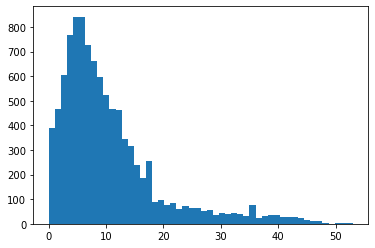

In [38]:
# 리뷰 단어 수에 대한 히스토그램
plt.hist([len(token) for token in setence_remove],bins=50)
plt.show()

In [68]:
# word2vec으로 데이터 학습하기
# 리스트 내부에 각 문장의 토큰 리스트가 담긴 2차원 리스트 형태
# Series 형태의 데이터가 입력되면 음절 하나를 단어 하나로 인지하게 됨

from gensim.models import Word2Vec
model = Word2Vec(sentences = setence_remove, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [69]:
# 임베딩 행렬의 크기 확인하기 : 총 2664개 단어, 100개의 차원의 밀집행렬로 변환
print(model.wv.vectors.shape)

(2664, 100)


In [70]:
print(model.wv.vectors)

[[ 0.42731443  0.41627923  0.5139966  ... -0.03990507  0.08176668
  -0.25068003]
 [ 0.41489854  0.43755195  0.5179963  ... -0.05403402  0.07928354
  -0.2691566 ]
 [ 0.48777163  0.4718095   0.5820943  ... -0.04257302  0.0991053
  -0.2852643 ]
 ...
 [ 0.06589828  0.06578016  0.08555956 ... -0.01022381  0.01596564
  -0.03599433]
 [ 0.07471352  0.07769654  0.08818001 ... -0.00207889  0.013165
  -0.03847085]
 [ 0.06799853  0.07216128  0.08475997 ... -0.00191995  0.01430211
  -0.04095602]]


In [71]:
# '매력' 이라는 단어와 유사도가 높은 토큰 출력하기
print(model.wv.most_similar("매력"))

[('이고', 0.9998348355293274), ('개인', 0.9998215436935425), ('현실', 0.9998049736022949), ('인간', 0.9997547268867493), ('장면', 0.9997488260269165), ('일본', 0.9997330904006958), ('이라', 0.9997196197509766), ('듯', 0.9997185468673706), ('작품', 0.9997168779373169), ('짱', 0.99971604347229)]


In [72]:
model.wv.vocab

{'보다': <gensim.models.keyedvectors.Vocab at 0x1a35ee2ab80>,
 '평점': <gensim.models.keyedvectors.Vocab at 0x1a35ee2a880>,
 '너무': <gensim.models.keyedvectors.Vocab at 0x1a35ee2aa30>,
 '낮다': <gensim.models.keyedvectors.Vocab at 0x1a35ee2a8e0>,
 '두': <gensim.models.keyedvectors.Vocab at 0x1a35ee2ad00>,
 '개': <gensim.models.keyedvectors.Vocab at 0x1a35ee2ac40>,
 '더': <gensim.models.keyedvectors.Vocab at 0x1a35ee2a7f0>,
 '줌': <gensim.models.keyedvectors.Vocab at 0x1a35ee2ae80>,
 '그': <gensim.models.keyedvectors.Vocab at 0x1a35ee2ab50>,
 '기다': <gensim.models.keyedvectors.Vocab at 0x1a35ee2ab20>,
 '표정': <gensim.models.keyedvectors.Vocab at 0x1a35ee2a760>,
 '여운': <gensim.models.keyedvectors.Vocab at 0x1a35ee2aee0>,
 '이란': <gensim.models.keyedvectors.Vocab at 0x1a35ee2afa0>,
 '눈': <gensim.models.keyedvectors.Vocab at 0x1a35ee2a9a0>,
 '영화': <gensim.models.keyedvectors.Vocab at 0x1a35ee2ad30>,
 '아니다': <gensim.models.keyedvectors.Vocab at 0x1a35ee2aa90>,
 '가슴': <gensim.models.keyedvectors.Vocab at 0